In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a sample DataFrame
data = {'A': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Create a new column 'B' with consecutive values
df['B'] = df['A'].shift(fill_value=0) - 1

# Display the updated DataFrame
print(df)

    A   B
0  10  -1
1  20   9
2  30  19
3  40  29
4  50  39


In [3]:
track_record = pd.read_csv('track_record.csv')
#track_record['return2'] = track_record['return'].shift(fill_value=0)-1
#track_record['return2'] = track_record['return'] - 1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return3'] = track_record['return'] + track_record['return'].shift(fill_value=0)-1
#track_record['return4'] = track_record['return2'].cumsum()

set_inital = pd.DataFrame({'game_id': ["0000000"], "return": [1]})

#track_record = pd.concat([set_inital, track_record]).reset_index(drop=True)
#track_record['stake'] = track_record['return'].shift(fill_value=1)
#track_record['return_shifted'] = track_record['return'].shift(periods=-1)
track_record

,game_id,return
0,2832543,0.000000
1,2740886,1.593987
2,2917297,1.099060
3,4698338,0.000000
4,2974340,1.977124
...,...,...
119,4396152,1.666177
120,2743110,0.000000
121,4698326,1.460314
122,2769689,2.752729


In [4]:
stake = [1]
current_stake = 1
for i in track_record['return']:
    current_stake = (current_stake-1) + 1*i
    stake.append(current_stake)

stake

[1,
 0.0,
 0.5939871391919858,
 0.6930468702182246,
 -0.30695312978177536,
 0.6701710834119927,
 2.9131006027642607,
 3.883406734258906,
 4.655086509332435,
 5.110284855229978,
 4.110284855229978,
 5.452943681780649,
 4.452943681780649,
 4.834862109742185,
 3.8348621097421853,
 4.413098387151958,
 5.027930710365265,
 5.573051722647492,
 5.712307441693896,
 4.712307441693896,
 3.7123074416938957,
 2.7123074416938957,
 3.82779961013834,
 3.9436186825830717,
 4.236990132602861,
 3.2498613578374687,
 2.2498613578374687,
 3.928973911414163,
 2.928973911414163,
 2.7798625186700403,
 3.1283574875551547,
 2.1283574875551547,
 2.179234564841717,
 1.179234564841717,
 1.3849210711837023,
 2.7523567484378444,
 4.739798818298418,
 3.739798818298418,
 2.739798818298418,
 3.3741347681004,
 4.816803784211505,
 5.873303672985292,
 8.107270912860525,
 8.865118542706458,
 9.979554534908992,
 8.979554534908992,
 7.979554534908992,
 8.08933251782607,
 8.103628886700918,
 7.103628886700918,
 6.1036288867009

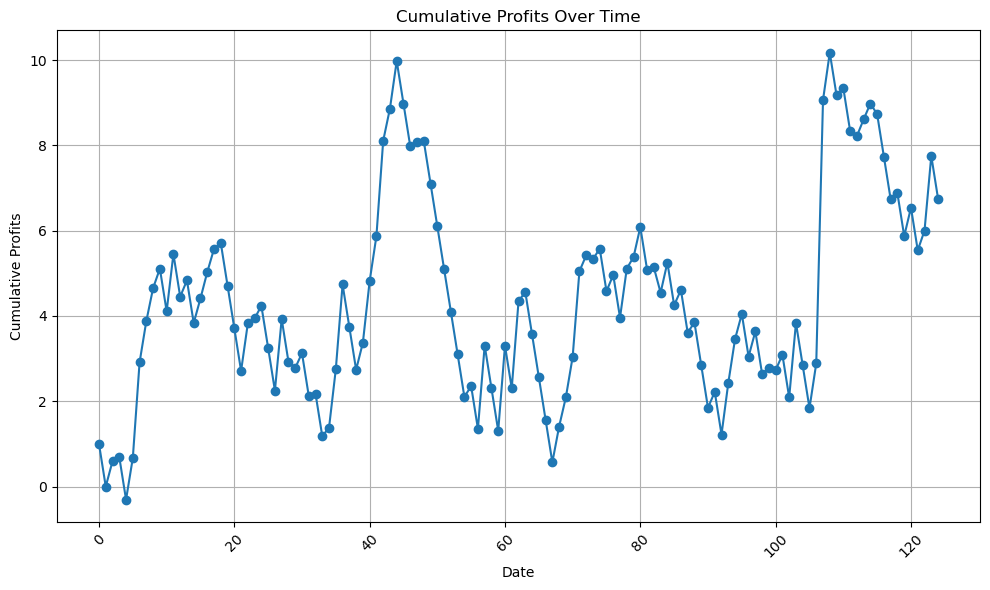

In [5]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(stake, marker='o', linestyle='-')
plt.title('Cumulative Profits Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()